#MOUNT GOOGLE DRIVE

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#INSTALL DEPENDENCIES

In [ ]:
import tensorflow as tf

In [ ]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.8 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#UTILITIES

In [ ]:
path='/content/gdrive/My Drive/URLBUG/'


In [ ]:
from ekphrasis.classes.segmenter import Segmenter
import re
seg_eng = Segmenter(corpus="twitter") 
_digits = re.compile('\d')
def contains_digits(d):
     return bool(_digits.search(d))
def converter(listoflist):
    lst=[]
   
    for ls in listoflist:
        
        if(type(ls) is list):
            for e in ls:
                if(e !=''):
                    lst.append((e))
        else:
           lst.append(ls)
    return lst  
def tokenparts(words):
    finalwords=[]
    for w in words:
       w=re.sub('\W+',' ',w)
       w=re.sub('\d+',' ',w)
       w=re.sub('_',' ',w)
       w=re.sub(';',' ',w)
       
       if(w!='' and w!='None' ):
#           words.append(w.split('_'))
#           words.remove(w)
          try:
             subwords=(seg_eng.segment(w))
             finalwords.append(subwords.split(' '))
          except:
            finalwords.append(w.split(' '))
    return (finalwords)
def obtainwordlist(url):
    words=re.findall(r'\w+\b', url)
    
    finalwords=tokenparts(words)
    final=converter(finalwords)
    
    return final 

Word statistics files not found!
Downloading... done!
Unpacking... done!
Reading twitter - 1grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_1grams.txt
Reading twitter - 2grams ...
generating cache file for faster loading...
reading ngrams /root/.ekphrasis/stats/twitter/counts_2grams.txt


/usr/local/lib/python3.7/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


In [ ]:
def converter(listoflist):
    lst=[]
   
    for ls in listoflist:
        
        if(type(ls) is list):
            for e in ls:
                if(e !=''):
                    lst.append((e))
        else:
           lst.append(ls)
    return lst  
def tokenparts(words):
    finalwords=[]
    for w in words:
       w=re.sub('\W+',' ',w)
       w=re.sub('\d+',' ',w)
       w=re.sub('_',' ',w)
       w=re.sub(';',' ',w)
       
       if(w!='' and w!='None' ):
#           words.append(w.split('_'))
#           words.remove(w)
          try:
             subwords=(seg_eng.segment(w))
             finalwords.append(subwords.split(' '))
          except:
            finalwords.append(w.split(' '))
    return (finalwords)
def obtainwordlist(url):
    words=re.findall(r'\w+\b', url)
    
    finalwords=tokenparts(words)
    final=converter(finalwords)
    
    return final 

In [ ]:
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

#LOAD DATASET

In [ ]:
import pandas as pd
import codecs,re
codecs.register_error("strict", codecs.ignore_errors)
from sklearn.model_selection import train_test_split
import numpy as np
def trainingData():

    data_dir_path = path
    Legitimate = (pd.read_csv(data_dir_path+'Legitimate/Leg_Training.csv',encoding="utf-8") )
    Malicious = pd.read_csv(data_dir_path+'Phishing/Phish_Training.csv',encoding="utf-8") 
    mal=len(Malicious)
    Leg=Legitimate.loc[0:(len(Malicious)-1),:]   
    frame1=([Leg,Malicious])
    url=np.concatenate(frame1).tolist()
    leg=len(Leg)
    
    print(leg)
    print(mal)
    label0=np.zeros((leg)).astype(int)
    label1=np.ones((mal)).astype(int)
    label=(np.concatenate((label0,label1)))
    label=pd.Series(label.tolist())
    d={'url':url,'label':label}
    url_data=pd.DataFrame(d, columns=['url','label'])
    return url_data['url'],url_data['label']


In [ ]:
def process(urls):
  urllist=[]
  for url in urls:
  
    urllist.append(url[0])
  return urllist

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ord_enc = OrdinalEncoder()
def train_BLE():
       filename=path+'/Ensemble/BLE/TrainFeatures_multiprocess1.csv'
       Featureset = pd.read_csv(filename,encoding="utf-8") 
       Featureset=Featureset.fillna(-1)
       Featureset=Featureset.dropna()
       Featureset["country"] = ord_enc.fit_transform(Featureset[["country"]])
       labels=Featureset['label']
       urls=Featureset['url']
       print(np.shape(Featureset))
       Features=Featureset.drop(['url','label'], axis=1)
       print(np.shape(Features))
       Features=Features.replace('?',-1)
       Features=Features.replace('TRUE',1)
       Features=Features.replace('True',1)
       Features=Features.replace('true',1)
       Features=Features.replace('FALSE',0)
       Features=Features.replace('False',0)
       Features=Features.replace('False',0)
       Features=Features.replace('0',0)
       Features.fillna(0)
       return Features,urls,labels

In [ ]:
import tensorflow as tf
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM, GRU, Embedding, Dense, Flatten, Bidirectional
from keras.layers.core import Dense, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
X,y=trainingData()

96693
96693


In [ ]:
X=process(X)

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K


def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall_keras = true_positives / (possible_positives + K.epsilon())
    return recall_keras


def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision_keras = true_positives / (predicted_positives + K.epsilon())
    return precision_keras


def specificity(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    return tn / (tn + fp + K.epsilon())


def negative_predictive_value(y_true, y_pred):
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))
    return tn / (tn + fn + K.epsilon())


def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2 * ((p * r) / (p + r + K.epsilon()))


def fbeta(y_true, y_pred, beta=2):
    y_pred = K.clip(y_pred, 0, 1)

    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)), axis=1)
    fp = K.sum(K.round(K.clip(y_pred - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    num = (1 + beta ** 2) * (p * r)
    den = (beta ** 2 * p + r + K.epsilon())
    return K.mean(num / den)


def matthews_correlation_coefficient(y_true, y_pred):
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1 - y_true) * y_pred, 0, 1)))
    fn = K.sum(K.round(K.clip(y_true * (1 - y_pred), 0, 1)))

    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    return num / K.sqrt(den + K.epsilon())


def equal_error_rate(y_true, y_pred):
    n_imp = tf.count_nonzero(tf.equal(y_true, 0), dtype=tf.float32) + tf.constant(K.epsilon())
    n_gen = tf.count_nonzero(tf.equal(y_true, 1), dtype=tf.float32) + tf.constant(K.epsilon())

    scores_imp = tf.boolean_mask(y_pred, tf.equal(y_true, 0))
    scores_gen = tf.boolean_mask(y_pred, tf.equal(y_true, 1))

    loop_vars = (tf.constant(0.0), tf.constant(1.0), tf.constant(0.0))
    cond = lambda t, fpr, fnr: tf.greater_equal(fpr, fnr)
    body = lambda t, fpr, fnr: (
        t + 0.001,
        tf.divide(tf.count_nonzero(tf.greater_equal(scores_imp, t), dtype=tf.float32), n_imp),
        tf.divide(tf.count_nonzero(tf.less(scores_gen, t), dtype=tf.float32), n_gen)
    )
    t, fpr, fnr = tf.while_loop(cond, body, loop_vars, back_prop=False)
    eer = (fpr + fnr) / 2

    return eer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify=y,random_state=42)
# Preprocess data for training.
max_chars = 20000
maxlen = 128

tokenizer = Tokenizer(num_words=max_chars, char_level=True)
tokenizer.fit_on_texts(X_train)
import pickle
file_name = path+"/Models/tokenizer_lstm.pkl"
# save
pickle.dump(tokenizer, open(file_name, "wb"))

Trainsequences = tokenizer.texts_to_sequences(X_train)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

trainingdata = pad_sequences(Trainsequences, maxlen=maxlen)
traininglabels=y_train
Testsequences = tokenizer.texts_to_sequences(X_test)
testingdata=pad_sequences(Testsequences, maxlen=maxlen)
testinglabels=y_test


Found 295 unique tokens.


#MODELLING

In [ ]:
import numpy as np
np.random.seed(0)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation,SpatialDropout1D,Bidirectional
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import regularizers
# Define callbacks for Keras.
import os

from tensorflow.keras.callbacks import EarlyStopping
custom_early_stopping = EarlyStopping(
    monitor='val_matthews_correlation_coefficient', 
    patience=10, 
    min_delta=0.001, 
    mode='max')

def lstm(tokenizer):
      num_chars = len(tokenizer.word_index)+1
      embedding_vector_length = 128

      # Create model for training.
      model = Sequential()
      model.add(Embedding(num_chars, embedding_vector_length, input_length=maxlen))
      model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
      model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)))
      model.add(Dense(1, activation='sigmoid'))
      model.summary()
      model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=[matthews_correlation_coefficient])
      return model



In [ ]:
custom_early_stopping = EarlyStopping(
    monitor='val_matthews_correlation_coefficient', 
    patience=10, 
    min_delta=0.001, 
    mode='max')

##TRAIN

In [ ]:
# Train.
# Train.

from tensorflow.keras.callbacks import ModelCheckpoint
output_dir = path+'/Ensemble/Original_LSTM_CHAR/'
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"Normal_trained_Char_lstm_weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
model=lstm(tokenizer)
model.fit(trainingdata, traininglabels,
        epochs=50,
        batch_size=1024,
        callbacks=[custom_early_stopping,modelcheckpoint],
        validation_split=0.20,
        shuffle=True
        )

# Evaluate model on test data.
score, acc = model.evaluate(testingdata, testinglabels, verbose=1, batch_size=1024)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 128, 128)          37888     
                                                                 
 bidirectional_10 (Bidirecti  (None, 128, 256)         263168    
 onal)                                                           
                                                                 
 bidirectional_11 (Bidirecti  (None, 128)              164352    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 465,537
Trainable params: 465,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
102/102 [============================

In [ ]:
# Evaluate model on test data.
score, acc = model.evaluate(testingdata, testinglabels, verbose=1, batch_size=1024)

63/63 [==============================] - 11s 171ms/step - loss: 0.0890 - matthews_correlation_coefficient: 0.9514


In [ ]:
model.fit(trainingdata, traininglabels,
        epochs=50,
        batch_size=1024,
        callbacks=[custom_early_stopping,modelcheckpoint],
        validation_split=0.20,
        shuffle=True
        )



Epoch 1/50
102/102 [==============================] - 246s 2s/step - loss: 0.0236 - matthews_correlation_coefficient: 0.9835 - val_loss: 0.0836 - val_matthews_correlation_coefficient: 0.9538
Epoch 2/50
102/102 [==============================] - 259s 3s/step - loss: 0.0217 - matthews_correlation_coefficient: 0.9849 - val_loss: 0.0896 - val_matthews_correlation_coefficient: 0.9520
Epoch 3/50
102/102 [==============================] - 248s 2s/step - loss: 0.0222 - matthews_correlation_coefficient: 0.9847 - val_loss: 0.0855 - val_matthews_correlation_coefficient: 0.9533
Epoch 4/50
102/102 [==============================] - 243s 2s/step - loss: 0.0211 - matthews_correlation_coefficient: 0.9853 - val_loss: 0.0885 - val_matthews_correlation_coefficient: 0.9511
Epoch 5/50
102/102 [==============================] - 242s 2s/step - loss: 0.0204 - matthews_correlation_coefficient: 0.9856 - val_loss: 0.0917 - val_matthews_correlation_coefficient: 0.9526
Epoch 6/50
102/102 [=========================

In [ ]:
model.save(path+'/Ensemble/Orginal_LSTM_CHAR/Finalmodel.hdf5')

In [ ]:
# Evaluate model on test data.
score, acc = model.evaluate(testingdata, testinglabels, verbose=1, batch_size=1024)

63/63 [==============================] - 52s 834ms/step - loss: 0.0958 - matthews_correlation_coefficient: 0.9539


#LOAD Already saved Model

In [ ]:
import tensorflow as tf

In [ ]:
LSTM_model=tf.keras.models.load_model(path+'/Ensemble/Original_LSTM_CHAR/Normal_trained_Char_lstm_weights.05.hdf5')

In [ ]:
# Evaluate model on test data.
from sklearn.metrics import matthews_corrcoef,f1_score,precision_score,recall_score,roc_auc_score,auc,confusion_matrix

#Testing Results

In [ ]:
y_pred=model.predict(testingdata)
y_prediction=[]
y_test=testinglabels
for y in y_pred:
    if(y>=0.5):
        y_prediction.append(1)
    else:
        y_prediction.append(0)


In [ ]:
from sklearn.metrics import matthews_corrcoef,f1_score,precision_score,recall_score,roc_auc_score,auc,confusion_matrix,accuracy_score

import csv
MCC=matthews_corrcoef(np.array(y_test), np.array(y_prediction))
Accuracy=accuracy_score(y_test, y_prediction)
Fscore=f1_score(np.array(y_test), np.array(y_prediction), average='macro')
Recall=recall_score(np.array(y_test), np.array(y_prediction), average='macro'),
precision=precision_score(np.array(y_test), np.array(y_prediction), average='macro')
AUC = roc_auc_score(np.array(y_test), np.array(y_prediction))
cm= confusion_matrix(np.array(y_test), np.array(y_prediction)) 
tn= cm[0, 0]
fp=cm[0, 1]
fn=cm[1, 0]
tp= cm[1, 1]
totalpos=(fn+tp)
totalneg=(fp+tn)
FPR=fp/totalneg
FNR=fn/totalpos
Overall=open(path+'/Ensemble/validation_results_new'+'.csv','w+',encoding='utf-8',newline='')
overall=csv.writer(Overall)
overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
overall.writerow([MCC,Accuracy,precision,Recall,Fscore,AUC,FPR,FNR]) 
Overall.close()

In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import matthews_corrcoef,f1_score,precision_score,recall_score,roc_auc_score,auc,confusion_matrix
fpr, tpr, thresholds = roc_curve(y_test, y_prediction)
auc_ = auc(fpr, tpr)
best_threshold = thresholds[np.argmax(-fpr + tpr)]

NameError: ignored

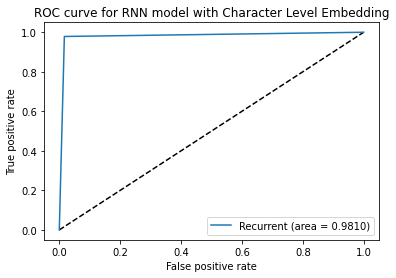

In [ ]:
model_name = "Recurrent"
model_full_name = "RNN model with Character Level Embedding"

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'{model_name} (area = {auc_:.4f})')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title(f'ROC curve for {model_full_name}')
plt.legend(loc='best')
plt.savefig(path+'_roc.pdf')
plt.show()

In [ ]:
print([MCC,acc,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos])

[0.9619810938925422, [0.05719982087612152, 0.9809876680374146], 0.9810123769890965, (0.9809687178941703,), 0.9809856957011167, 0.9809687178941703, 0.016655836382913233, 0.021406727828746176]


# Adversarial Testing Popular Seeds

In [ ]:
def testPopularData(atype):
    if(atype=='AllAdversary'):
        data_dir_path = path+'/Adversaries/'
        A1 = pd.read_csv(data_dir_path+'DomainAdversary.csv',encoding="utf-8") 
        A1['Adversary']='Domain'
        A2 = pd.read_csv(data_dir_path+'TLDAdversary.csv',encoding="utf-8") 
        A2['Adversary']='TLD'
        A3 = pd.read_csv(data_dir_path+'PathAdversary.csv',encoding="utf-8") 
        A3['Adversary']='Path'
        #A4=pd.read_csv(data_dir_path+'dmswap.csv',encoding="utf-8") 

        A3=A3.loc[0:len(A1),:]
        #AV4=A4
        Mali=pd.concat([A1, A2, A3]).reset_index() 
        
        
         
    else:
        data_dir_path = path+'/Adversaries/'+atype
        Malicious = pd.read_csv(data_dir_path+'.csv',encoding="utf-8")
        if(atype=='PathAdversary'):
             Malicious = (Malicious)
             Malicious=Malicious.reset_index() 
             Mali=Malicious.loc[0:50000,:]
             
             
        else:
            Mali=Malicious
        Mali['Adversary']=atype    
    
    DeceptiveURLs=Mali['craftedurl']
    BenignURLs=Mali['seedurl'].drop_duplicates()    
    labeld=np.ones(len(DeceptiveURLs))
    labelb=np.zeros(len(BenignURLs))
    frame1=([DeceptiveURLs,BenignURLs])
    url=np.concatenate(frame1).tolist()
    label=(np.concatenate((labeld,labelb)))
    label=pd.Series(label.tolist())
    d={'url':url,'label':label,'adversary':Mali['Adversary'],'type':Mali['adversarytype'],'method':Mali['adversarymethod']}
    url_data=pd.DataFrame(d, columns=['url','label','adversary','type','method'])
    print(len(url_data))
    return url_data['url'],url_data['label'],url_data['adversary'],url_data['type'],url_data['method']

In [ ]:
for j in range(0,4):
        if(j==3):
          atype='DomainAdversary'          
        if j==2:
          atype='TLDAdversary'
        if j==1:
         atype='PathAdversary'
        if j==0:
          atype='AllAdversary'

        adversarialURLs,adversarialLabels,adversary,adversaryType,adversaryMethod=testPopularData(atype)
        d={'url':adversarialURLs,'label':adversarialLabels}
        dataset_test=pd.DataFrame(d, columns=['url','label'])
        test_sequences = tokenizer.texts_to_sequences(dataset_test['url'])
        X_test = pad_sequences(test_sequences, maxlen=maxlen)
        y_test = dataset_test['label']
        y_pred = LSTM_model.predict(X_test)
        y_prediction=[]
        for y in y_pred:
            if(y>=0.5):
                y_prediction.append(1)
            else:
                y_prediction.append(0)
        
        advAccuracy=accuracy_score(y_test, y_prediction)
        MCC=matthews_corrcoef(y_test, y_prediction)
        Fscore=f1_score(y_test, y_prediction, average='macro')
        Recall=recall_score(y_test, y_prediction, average='macro'),
        precision=precision_score(y_test, y_prediction, average='macro')
        AUC = roc_auc_score(y_test, y_prediction)
        cm= confusion_matrix(y_test, y_prediction) 
        tn= cm[0, 0]
        fp=cm[0, 1]
        fn=cm[1, 0]
        tp= cm[1, 1]
        totalpos=(fn+tp)
        totalneg=(fp+tn)
        FPR=fp/totalneg
        FNR=fn/totalpos
        Overall=open(path+'/Popular/'+atype+'LSTM_targets_validation_results'+'.csv','w+',encoding='utf-8',newline='')
        overall=csv.writer(Overall)
        overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
        overall.writerow([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]) 
        Overall.close()                
        Details=open(path+'/Popular/'+atype+'LSTM_targets_validation_result_details'+'.csv','w+',encoding='utf-8',newline='')
        detail=csv.writer(Details)
        detail.writerow(['adversarialURL','adversarialLabel','ADVERSARY','TYPE','METHOD','result'])
        correct=0
        if(atype=='AllAdversary'):
            for i,y in enumerate(y_prediction):
                
                if(y!=y_test[i]):
                    
                    detail.writerow([adversarialURLs[i],adversarialLabels[i],adversary[i],adversaryType[i],adversaryMethod[i],'0'])
                else:
                    correct+=1
                    detail.writerow([adversarialURLs[i],adversarialLabels[i],adversary[i],adversaryType[i],adversaryMethod[i],'1'])
        print(correct/len(y_prediction))
        Details.close()

35190
0.6398124467178176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


50004
0.0
10049
0.0
12586
0.0


In [ ]:
def testFutureData(atype):
    if(atype=='AllAdversary'):
        data_dir_path = path+'/Adversaries/Test_'
        A1 = pd.read_csv(data_dir_path+'DomainAdversary.csv',encoding="utf-8") 
        A1['Adversary']='Domain'
        A2 = pd.read_csv(data_dir_path+'TLDAdversary.csv',encoding="utf-8") 
        A2['Adversary']='TLD'
        A3 = pd.read_csv(data_dir_path+'PathAdversary.csv',encoding="utf-8") 
        A3['Adversary']='Path'
        #A4=pd.read_csv(data_dir_path+'dmswap.csv',encoding="utf-8") 

        A3=A3.loc[0:len(A1),:]
        #AV4=A4
        Mali=pd.concat([A1, A2, A3]).reset_index() 
        
        
         
    else:
        data_dir_path = path+'/Adversaries/'+atype
        Malicious = pd.read_csv(data_dir_path+'.csv',encoding="utf-8")
        if(atype=='PathAdversary'):
             Malicious = (Malicious)
             Malicious=Malicious.reset_index() 
             Mali=Malicious.loc[0:50000,:]
             
             
        else:
            Mali=Malicious
        Mali['Adversary']=atype    
    
    DeceptiveURLs=Mali['craftedurl']
    BenignURLs=Mali['seedurl'].drop_duplicates()    
    labeld=np.ones(len(DeceptiveURLs))
    labelb=np.zeros(len(BenignURLs))
    frame1=([DeceptiveURLs,BenignURLs])
    url=np.concatenate(frame1).tolist()
    label=(np.concatenate((labeld,labelb)))
    label=pd.Series(label.tolist())
    d={'url':url,'label':label,'adversary':Mali['Adversary'],'type':Mali['adversarytype'],'method':Mali['adversarymethod']}
    url_data=pd.DataFrame(d, columns=['url','label','adversary','type','method'])
    print(len(url_data))
    return url_data['url'],url_data['label'],url_data['adversary'],url_data['type'],url_data['method']

# FuturePrediction_Adversarial_Testing

In [ ]:
for j in range(0,4):
        if(j==3):
          atype='DomainAdversary'          
        if j==2:
          atype='TLDAdversary'
        if j==1:
         atype='PathAdversary'
        if j==0:
          atype='AllAdversary'

        adversarialURLs,adversarialLabels,adversary,adversaryType,adversaryMethod=testFutureData(atype)
        d={'url':adversarialURLs,'label':adversarialLabels}
        dataset_test=pd.DataFrame(d, columns=['url','label'])
        test_sequences = tokenizer.texts_to_sequences(dataset_test['url'])
        X_test = pad_sequences(test_sequences, maxlen=maxlen)
        y_test = dataset_test['label']
        y_pred = LSTM_model.predict(X_test)
        y_prediction=[]
        for y in y_pred:
            if(y>=0.5):
                y_prediction.append(1)
            else:
                y_prediction.append(0)
        
        advAccuracy=accuracy_score(y_test, y_prediction)
        MCC=matthews_corrcoef(y_test, y_prediction)
        Fscore=f1_score(y_test, y_prediction, average='macro')
        Recall=recall_score(y_test, y_prediction, average='macro'),
        precision=precision_score(y_test, y_prediction, average='macro')
        AUC = roc_auc_score(y_test, y_prediction)
        cm= confusion_matrix(y_test, y_prediction) 
        tn= cm[0, 0]
        fp=cm[0, 1]
        fn=cm[1, 0]
        tp= cm[1, 1]
        totalpos=(fn+tp)
        totalneg=(fp+tn)
        FPR=fp/totalneg
        FNR=fn/totalpos
        Overall=open(path+'/Future/'+atype+'LSTM_targets_validation_results'+'.csv','w+',encoding='utf-8',newline='')
        overall=csv.writer(Overall)
        overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
        overall.writerow([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]) 
        Overall.close()                
        Details=open(path+'/Future/'+atype+'LSTM_targets_validation_result_details'+'.csv','w+',encoding='utf-8',newline='')
        detail=csv.writer(Details)
        detail.writerow(['adversarialURL','adversarialLabel','ADVERSARY','TYPE','METHOD','result'])
        correct=0
        if(atype=='AllAdversary'):
            for i,y in enumerate(y_prediction):
                
                if(y!=y_test[i]):
                    
                    detail.writerow([adversarialURLs[i],adversarialLabels[i],adversary[i],adversaryType[i],adversaryMethod[i],'0'])
                else:
                    correct+=1
                    detail.writerow([adversarialURLs[i],adversarialLabels[i],adversary[i],adversaryType[i],adversaryMethod[i],'1'])
        print(correct/len(y_prediction))
        Details.close()

84405
0.053681653930454355


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


50004
0.0
10049
0.0
12586
0.0


#VISUAL SIMILARITY

In [ ]:
!pip install missingno
!pip install seaborn
!pip install tldextract
!pip install homoglyphs
!pip install nltk
!pip install validators
!pip install rfc3986

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 93 kB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 7.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=2b553e63cd10c2699cfc62924866bea6043f2f47e47724e36b458562b2e1640c
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validator

In [ ]:
# Import libraries
#Creating URL embeddings
from ekphrasis.classes.segmenter import Segmenter
import re
seg_eng = Segmenter(corpus="twitter",max_split_length=40) 

import pickle ,os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import time
from collections import Counter
from urllib.parse import urlparse
import tldextract
from gensim.models import Doc2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


import tensorflow as tf
import collections
import os
import random
import numpy as np
from tqdm import tqdm
import sys, email
import pandas as pd 
import math
from tqdm import tqdm
import string
import collections
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
import lightgbm as lgb
from lightgbm import LGBMClassifier


from scipy.sparse import hstack
# -*- coding: utf-8 -*-
"""
Created on Thu Aug  1 11:42:35 2019

@author: bushra
"""
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
import pandas as pd
import csv
from numpy import average
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn.metrics import coverage_error
from sklearn.svm import LinearSVC
from sklearn.metrics import average_precision_score
# Load CSV (using python)
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import label_ranking_average_precision_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

from sklearn import metrics
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from numpy import sort
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import itertools,re
from sklearn.model_selection import StratifiedKFold
# Load datasets
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import feature_extraction

 # -*- coding: utf-8 -*-
"""
Created on Thu Jul 25 14:28:29 2019

@author: bushra
"""
import random
import validators
from urllib.parse import urlunparse,urlparse
import re
import pandas as pd
#from rfc3986 import urlparse
from rfc3986 import is_valid_uri
import itertools
import tldextract
from gensim.models.doc2vec import TaggedDocument
import homoglyphs as hg,os
import sys 
import numpy as np
from nltk import FreqDist
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
import random
import csv
from nltk.corpus import brown
from collections import Counter
import urllib.request
from difflib import SequenceMatcher
import homoglyphs as hg,os
from urllib.request import Request, urlopen
import time
start = time.time()
homoglyphs =hg.Homoglyphs(languages={'en'},
            strategy=hg.STRATEGY_LOAD,
            ascii_strategy=hg.STRATEGY_REMOVE
        )
import random
import validators
import re
import pandas as pd
from rfc3986 import urlparse
from rfc3986 import is_valid_uri
import itertools
import sys 
from nltk import FreqDist
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import re
import random
import csv
from nltk.corpus import brown
from collections import Counter
import urllib.request
import spacy
import pandas as pd 
import codecs,re
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

codecs.register_error("strict", codecs.ignore_errors)
import re
#path="E:\\PrimaryStudy1\\Code\\part2\\wordembeddingDataset\\glove.840B.300d\\"
#word2vec_output_file = path+'glove.840B.300d.txt.word2vec'
##glove2word2vec(path+'glove.840B.300d.txt', word2vec_output_file)
#model = KeyedVectors.load_word2vec_format(word2vec_output_file)
#print(model.wv.most_similar(positive='secure'))
#wordsindex2word=model.wv.index2word
      
#words = set(brown.words())

Reading twitter - 1grams ...
Reading twitter - 2grams ...


In [ ]:


def findIP(List):
        M=List[0]
        ip = re.findall( r'[0-9-]+(?:\.[0-9]+){3}', M )
        if ip !=[]:
            List.remove(M)
        else:
            ip=''
        return str(ip)

def findProtocol(List):
   
    for M in List:
        if(':' in M):
            protocol=M.split(':').pop(0)
            List.remove(M)
            return protocol
        else:
            return ''
        
def findDomains(List):
     domain=''
     sld=''
     tld=''
     port=''
     for M in List:
         if('.' in M):
             splitlist=M.split('.')
             if(M.count('.')>1):
                 tld=splitlist.pop()
                 ld=tld.split(':')
                 tld=ld.pop(0)
                 if(ld!=[]):
                     port=ld.pop()
                 sld=splitlist.pop()
                 for i,l in enumerate(splitlist):
                    domain+=l
                    if(i!=len(splitlist)-1):
                        domain+='.'
                 List.remove(M)
                 return tld,sld,domain,port
             else:
                tld=splitlist.pop()
                ld=tld.split(':')
                tld=ld.pop(0)
                if(ld!=[]):
                     port=ld.pop()
                domain=splitlist.pop()
                List.remove(M)
                return tld,sld,domain,port
     return tld,sld,domain,port
def get_words(path):
    """load stop words """
    
    with open(path, 'r', encoding="utf-8") as f:
        stopwords = f.read().splitlines()
        return stopwords    
def urltokenizer(url):
    tld='None'
    sld='None'
    domain=''
    port='None'
    path='None'
    exe='None'
    protocol=''
    urlparsed = urlparse(url)
    Major=url.split('/')  #[http:,www.google.com.sg, webhp?hl=zh-CN] 
    ip= (findIP(Major))
    tem=urlparsed.scheme
    if(tem is not None):
        if('.' in tem):
            Lst=tem.split('/')
            [tld,sld,domain,port]=(findDomains(Lst))
            
        else:
            protocol=urlparsed.scheme
    
    userinfo=urlparsed.userinfo
    host=urlparsed.host
    pathurl=urlparsed.path
    if(pathurl is not None and host is None):
        Lst=pathurl.split('/')
        if('.' in pathurl):
            [tld,sld,domain,port]=(findDomains(Lst))
            [path,exe]=(findPathQueryFragment(Lst))
        else:
            path=pathurl
    elif(host is not None and pathurl is None):
        Lst=host.split('/')
        ip= (findIP(Lst))
        if('.' in host):
            [tld,sld,domain,port]=(findDomains(Lst))
            [path,exe]=(findPathQueryFragment(Lst))
        else:
            path+=host
    elif(host is not None and pathurl is not None):
        Lst=host.split('/')
        ip= (findIP(Lst))
        if('.' in host):
            [tld,sld,domain,port]=(findDomains(Lst))
        if('.' in pathurl):
            Lst1=pathurl.split('/')
            if(Lst!=[]):
                for q in Lst:
                    Lst1.append(Lst.remove(q))
            [path,exe]=(findPathQueryFragment(Lst1))
        if('.' not in host):
            path+=host
        if('.' not in pathurl):
            path+=pathurl
        
            
    
    parameter=urlparsed.query
    fragment=urlparsed.fragment
    [sld,domain,tld]=tldextract.extract(url)
    if(path=='/'):
        path=''
    if(domain!=''):
        domain=' '.join(converter(tokenparts(domain.split('.'))))
    if(domain=='' and ip!=''):
        domain=ip
    if(path!=None and path!='' and path!='/'):
    
        path=' '.join(converter(tokenparts(re.findall(r"[\w']+", path))))
    else:
        path='None'
    if(sld!='None' and sld!='' and sld!=None):
    
        sld=' '.join(converter(tokenparts(sld.split('.'))))
    else:
        sld='www'
    if(parameter!=None):
        parameter=' '.join(converter(tokenparts(re.findall(r"[\w']+", parameter))))
    else:
        parameter='None'
    if(fragment!=None):
        fragment=' '.join(converter(tokenparts(re.findall(r"[\w']+", fragment))))
    else:
        fragment='None'
    if(exe==''):
        exe='None'
    return [ip,port,protocol,tld,(sld),userinfo,host,domain,(path),(parameter),(fragment),exe]
          
       
                
def findPathQueryFragment(List):
    path=''
    query=''
    fragment=''
    exe=''
    remaining=''
    last='p'
    previousch=''
   #eas?camp=1932-1;cre=mu&grpid=1738&tag_id=618&nums=FGApbjFAAA

    for i,M in enumerate(List):
        remaining=''
        if('.' in M and i==len(List)-1):  
            newList=M.split('.') 
            exe+=newList.pop()
            for s,q in enumerate(newList):
                if(q is not None):
                    path+='/'+newList.pop(s)
           
                  
        else:
            if(i<len(List)-1):
                path+=M+'/'
            else:
                path+=M
        
                
      
           
         
    return path,exe   
def convert(ls,op): 
      
    # Converting integer list to string list 
    s = [str(i) for i in ls] 
      
    # Join list items using join() 
    res = ("op".join(s)) 
      
    return(res) 

# Extract NLP features

# config 1: Bag-of-word without tf-idf
# config 2: Bag-of-word with tf-idf
# config 3: N-gram without tf-idf
# config 4: N-gram with tf-idf
_digits = re.compile('\d')
def contains_digits(d):
     return bool(_digits.search(d))
def tokenparts(words):
    finalwords=[]
    for w in words:
       w=re.sub('\W+',' SPCHAR ',w)
       w=re.sub('\d+',' DIGITCHAR ',w)
       w=re.sub('_',' ',w)
       w=re.sub(';',' ',w)
       
       if(w!='' and w!='None' ):
#           words.append(w.split('_'))
#           words.remove(w)
           try: 
              subwords=(seg_eng.segment(w.strip()))         
              finalwords.append(subwords.split(' '))
           except:
             finalwords.append(w.strip())
    return (finalwords)


def converter(listoflist):
    lst=[]
   
    for ls in listoflist:
        
        if(type(ls) == list):
            for e in ls:
                if(' ' in e):
                  
                  for ele in (e.split(' ')):
                    
                    lst.append(ele)
                elif(e !=''):
                    lst.append(e)
        else:
           lst.append(ls)
    
    return lst



In [ ]:
import string
def getword_tokens(url):
           
                 wordlist=''.join(url)
                 [ip,port,protocol,tld,(sld),userinfo,host,domain,(path),(parameter),(fragment),exe] =urltokenizer(wordlist)
                 if(ip is not None and ip !='None' and ip.strip()!=''):
                   domain='ipaddress'
                 if(port is not None and port !='None' and port.strip()!=''):
                   domain='ipaddress:port' 
                 wordtoken=[port,protocol,userinfo,(sld),domain,tld,(path),(parameter),(fragment),exe] 
                 finalwordtokens=[ ]
                 for v in wordtoken:
                   if(v is not None and v !='' and v is not 'None'):
                     
                     if(type(v) == list):
                         finalwordtokens.append(v)
                     else:
                         v=v.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
                         if(' ' in v):
                           v=v.split(' ')
                         if(type(v)==list):
                           finalwordtokens.append(v)
                         else:
                          finalwordtokens.append([v])
                     
                 
                 wordtokens= list(itertools.chain.from_iterable(finalwordtokens))
                 if('' in wordtokens):
                   wordtokens.remove('')
                 
                 return  wordtokens
              
                 

In [ ]:
oaurls,oalabels=LegtrainingData()
from gensim.models import Doc2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model_dbow=Doc2Vec.load(path+'Models/Visualsimilarity.d2v')
!pip install textdistance

In [ ]:
!pip install textdistance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import editdistance
import textdistance
url='www.netflix.com/'
wordtoken=getword_tokens(url)
model_dbow.random.seed(0)
new_vector = model_dbow.infer_vector(wordtoken,steps=20, alpha=0.025)
sim=model_dbow.docvecs.most_similar([new_vector])
labelssim=[]
levdistance=[]
lcsdistance=[]
jarodistance=[]
similarity_weight=[]
for s in sim:
        simurl=oaurls[s[0]]
        print(simurl)
        simwordtoken=' '.join(getword_tokens(simurl))
        labelssim.append(oalabels[s[0]])
        similarity_weight.append(s[1])
        levdistance.append(textdistance.jaccard.similarity(simwordtoken, ' '.join(wordtoken)))
        jarodistance.append(textdistance.jaro.similarity(simwordtoken, ' '.join(wordtoken)))
        lcsdistance.append(textdistance.lcsstr.similarity(simwordtoken, ' '.join(wordtoken)))
proz=labelssim.count(0)/10
pro1=labelssim.count(1)/10

http://www.frostjedi.com/vex/


In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing
import nltk
from nltk.corpus import stopwords

In [ ]:
X,y=LegtrainingData()
X_train, L_X_test, y_train, L_y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
X_train=list(X_train)
y_train=list(y_train)
L_X_test=list(L_X_test)
L_y_test=list(L_y_test)

In [ ]:
def testData(L_X_test):

    data_dir_path = path
    Legitimate = L_X_test
    Malicious = pd.read_csv(data_dir_path+'Phishing//Phish_Training.csv',encoding="utf-8") 
    mal=len(Malicious)
    Leg=Legitimate[:mal]
    frame1=([Leg,Malicious['url']])
    url=np.concatenate(frame1).tolist()
    leg=len(Leg)
    
    print(leg)
    print(mal)
    label0=np.zeros((leg))
    label1=np.ones((mal))
    label=(np.concatenate((label0,label1)))
    label=pd.Series(label.tolist())
    d={'url':url,'label':label}
    url_data=pd.DataFrame(d, columns=['url','label'])
    return url_data['url'],url_data['label']

In [ ]:
X,y=testData(L_X_test)

96693
96693


In [ ]:
len(X)

193386

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
len(X_train)

135370

In [ ]:
X_train=list(X_train)
y_train=list(y_train)
X_test=list(X_test)
y_test=list(y_test)

In [ ]:
def main(urllist,labels):
    #urls,labels=trainingData()
    wordtokens=[]
    urlwords=[]
    for i,url in enumerate(urllist):
              try:
                 
                 words=getword_tokens(url)
                 urlwords.append(words)
                 wordtokens.append(TaggedDocument(words,tags=[int(labels[i])]))
              except Exception as e:
                print("ERRRORRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR")
                print(i, url)
                break
            
    
    with open('urlwords.pkl', 'wb') as f:
        pickle.dump(urlwords, f)   
    with open('urlwordstagged.pkl', 'wb') as f:
        pickle.dump(wordtokens, f) 
    return (wordtokens)

In [ ]:
test_documents=main(X_test,y_test)
print(test_documents[0])

TaggedDocument(['i', 'back', 'eb', 'digitchar', 'a', 'com', 'scam', 'a', 'paypal', 'i', 'digitchar'], [1])


In [ ]:
print(X_train[0])
print(getword_tokens(X_train[0]))
main(X_train[0],y_train[0])

In [ ]:
train_documents=main(X_train,y_train)
print(train_documents[0])


TaggedDocument(['http', 'www', 'ipaddress', 'images', 'asinhas', 'digitchar', 'html'], [1])


In [ ]:
cores = multiprocessing.cpu_count()
model_dbow = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores, alpha=0.025, min_alpha=0.001)

In [ ]:
model_dbow=Doc2Vec.load(path+'Models/Visualsimilarity.d2v')

In [ ]:
from gensim.models import Doc2Vec
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model_dbow=Doc2Vec.load(path+'Models/Visualsimilarity.d2v')
!pip install textdistance

NameError: ignored

In [ ]:
model_dbow.build_vocab([x for x in tqdm(train_documents)])
train_documents  = utils.shuffle(train_documents)
model_dbow.train(train_documents,total_examples=len(train_documents), epochs=30)

model_dbow.save(path+'Visualsimilarity.d2v')

100%|██████████| 734001/734001 [00:00<00:00, 3063282.41it/s]


In [ ]:
def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors

In [ ]:
y_train, X_train = vector_for_learning(model_dbow, train_documents)
y_test, X_test = vector_for_learning(model_dbow, test_documents)

# logreg = LogisticRegression(n_jobs=1, C=1e5)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)
# print('Testing accuracy for movie plots%s' % accuracy_score(y_test, y_pred))
# print('Testing F1 score for movie plots: {}'.format(f1_score(y_test, y_pred, average='weighted')))

In [ ]:
from sklearn.metrics import matthews_corrcoef,f1_score,precision_score,recall_score,roc_auc_score,auc,confusion_matrix,accuracy_score
# RFT_DOC =RandomForestClassifier(n_jobs=1, random_state=42)
# RFT_DOC.fit(X_train, y_train)
RFT_DOC=pickle.load(open(path+'/Models/visual_similarity_rft.pkl', "rb"))
y_pred = RFT_DOC.predict(X_test)
y_prediction=y_pred
advAccuracy=accuracy_score(y_test, y_prediction)
MCC=matthews_corrcoef(y_test, y_prediction)
Fscore=f1_score(y_test, y_prediction, average='macro')
Recall=recall_score(y_test, y_prediction, average='macro'),
precision=precision_score(y_test, y_prediction, average='macro')
AUC = roc_auc_score(y_test, y_prediction)
cm= confusion_matrix(y_test, y_prediction) 
tn= cm[0, 0]
fp=cm[0, 1]
fn=cm[1, 0]
tp= cm[1, 1]
totalpos=(fn+tp)
totalneg=(fp+tn)
FPR=fp/totalneg
FNR=fn/totalpos
Overall=open(path+'/Models/'+'Visual_Similarity_validation_results'+'.csv','w+',encoding='utf-8',newline='')
overall=csv.writer(Overall)
overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
print([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos])
overall.writerow([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]) 
Overall.close()        

['MCC', 'accuracy', 'precision', 'recall', 'f1', 'auc', 'FPR', 'FNR']


In [ ]:
[MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]

[0.813746652728812,
 0.9068532818532818,
 0.9069113781701348,
 (0.9068352781170439,),
 0.9068464180839546,
 0.906835278117044,
 0.09890375903447798,
 0.08742568473143407]

In [ ]:
def testPopularData(atype):
    if(atype=='AllAdversary'):
        data_dir_path = path+'/Adversaries/'
        A1 = pd.read_csv(data_dir_path+'DomainAdversary.csv',encoding="utf-8") 
        A1['Adversary']='Domain'
        A2 = pd.read_csv(data_dir_path+'TLDAdversary.csv',encoding="utf-8") 
        A2['Adversary']='TLD'
        A3 = pd.read_csv(data_dir_path+'PathAdversary.csv',encoding="utf-8") 
        A3['Adversary']='Path'
        #A4=pd.read_csv(data_dir_path+'dmswap.csv',encoding="utf-8") 

        A3=A3.loc[0:len(A1),:]
        #AV4=A4
        Mali=pd.concat([A1, A2, A3]).reset_index() 
        
        
         
    else:
        data_dir_path = path+'/Adversaries/'+atype
        Malicious = pd.read_csv(data_dir_path+'.csv',encoding="utf-8")
        if(atype=='PathAdversary'):
             Malicious = (Malicious)
             Malicious=Malicious.reset_index() 
             Mali=Malicious.loc[0:50000,:]
             
             
        else:
            Mali=Malicious
        Mali['Adversary']=atype    
    
    DeceptiveURLs=Mali['craftedurl']
    BenignURLs=Mali['seedurl'].drop_duplicates()    
    labeld=np.ones(len(DeceptiveURLs))
    labelb=np.zeros(len(BenignURLs))
    frame1=([DeceptiveURLs,BenignURLs])
    url=np.concatenate(frame1).tolist()
    label=(np.concatenate((labeld,labelb)))
    label=pd.Series(label.tolist())
    d={'url':url,'label':label,'adversary':Mali['Adversary'],'type':Mali['adversarytype'],'method':Mali['adversarymethod']}
    url_data=pd.DataFrame(d, columns=['url','label','adversary','type','method'])
    print(len(url_data))
    return url_data['url'],url_data['label'],url_data['adversary'],url_data['type'],url_data['method']

In [ ]:
for j in range(0,4):
        if(j==3):
          atype='DomainAdversary'          
        if j==2:
          atype='TLDAdversary'
        if j==1:
         atype='PathAdversary'
        if j==0:
          atype='AllAdversary'

        adversarialURLs,adversarialLabels,adversary,adversaryType,adversaryMethod=testPopularData(atype)
        test_documents_popular=main(adversarialURLs,adversarialLabels)
        y_test, X_test = vector_for_learning(model_dbow, test_documents_popular)
        y_pred = RFT_DOC.predict(X_test)
        y_prediction=[]
        for y in y_pred:
            if(y>=0.5):
                y_prediction.append(1)
            else:
                y_prediction.append(0)
        
        advAccuracy=accuracy_score(y_test, y_prediction)
        MCC=matthews_corrcoef(y_test, y_prediction)
        Fscore=f1_score(y_test, y_prediction, average='macro')
        Recall=recall_score(y_test, y_prediction, average='macro'),
        precision=precision_score(y_test, y_prediction, average='macro')
        AUC = roc_auc_score(y_test, y_prediction)
        cm= confusion_matrix(y_test, y_prediction) 
        tn= cm[0, 0]
        fp=cm[0, 1]
        fn=cm[1, 0]
        tp= cm[1, 1]
        totalpos=(fn+tp)
        totalneg=(fp+tn)
        FPR=fp/totalneg
        FNR=fn/totalpos
        Overall=open(path+'/Popular/'+atype+'_targets_validation_results_DOC2VEC'+'.csv','w+',encoding='utf-8',newline='')
        overall=csv.writer(Overall)
        overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
        overall.writerow([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]) 
        Overall.close()                
        Details=open(path+'/Popular/'+atype+'_targets_validation_result_details_DOC2VEC'+'.csv','w+',encoding='utf-8',newline='')
        detail=csv.writer(Details)
        detail.writerow(['adversarialURL','adversarialLabel','ADVERSARY','TYPE','METHOD','result'])
        correct=0
        if(atype=='AllAdversary'):
            for i,y in enumerate(y_prediction):
                
                if(y!=y_test[i]):
                    
                    detail.writerow([adversarialURLs[i],adversarialLabels[i],adversary[i],adversaryType[i],adversaryMethod[i],'0'])
                else:
                    correct+=1
                    detail.writerow([adversarialURLs[i],adversarialLabels[i],adversary[i],adversaryType[i],adversaryMethod[i],'1'])
        print(correct/len(y_prediction))
        Details.close()

35190
0.4887752202330207


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


50004
0.0
10049
0.0
12586
0.0


In [ ]:
print([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos])

[0.019937036329654174, 0.38193230573653264, 0.5007539315914229, (0.6318042054915689,), 0.27791003292356964, 0.6318042054915689, 0.11764705882352941, 0.6187445301933328]


#Load Basic Lexical + External Model

In [ ]:
!pip install xgboost==1.4.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 166.7 MB 19 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
ord_enc = OrdinalEncoder()
def testPopularData_BLE(atype):
       filename=path+'/Ensemble/BLE/test'+atype+'Features.csv'
       Featureset = pd.read_csv(filename,encoding="utf-8") 
       Featureset=Featureset.fillna(-1)
       Featureset=Featureset.dropna()
       Featureset["country"] = ord_enc.fit_transform(Featureset[["country"]])
       labels=Featureset['label']
       urls=Featureset['url']
       print(np.shape(Featureset))
       Features=Featureset.drop(['url','label'], axis=1)
       print(np.shape(Features))
       Features=Features.replace('?',-1)
       Features=Features.replace('TRUE',1)
       Features=Features.replace('True',1)
       Features=Features.replace('true',1)
       Features=Features.replace('FALSE',0)
       Features=Features.replace('False',0)
       Features=Features.replace('false',0)
       Features=Features.replace('0',0)
       return Features,urls,labels

In [ ]:
from sklearn.metrics import make_scorer,balanced_accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support, accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import matthews_corrcoef,f1_score,precision_score,recall_score,roc_auc_score,auc,confusion_matrix
xgb=XGBClassifier(max_depth=51,tree_method='auto')
Train_Features,X,y=train_BLE()
# enumerate splits
def FPR(clf, X, y):
     y_pred = clf.predict(X)
     cm= confusion_matrix(y, y_pred) 
     tn= cm[0, 0]
     fp=cm[0, 1]
     fn=cm[1, 0]
     tp= cm[1, 1]
     totalpos=(fn+tp)
     totalneg=(fp+tn)
             
     return fp/totalneg
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'balanced_accuracy': make_scorer(balanced_accuracy_score),
                 'precision': make_scorer(precision_score, average='macro'),
                 'recall': make_scorer(recall_score, average='macro'),
                 'f1': make_scorer(f1_score, average='macro'),
                 'auc':'roc_auc',
                 'Matthew': make_scorer(matthews_corrcoef),
                 'FPR':FPR
                 }


(193337, 152)
(193337, 150)


In [ ]:
Train_Features['spf'].unique()

array([ 0, -1,  1])

In [ ]:
kf = StratifiedKFold(n_splits=10,random_state=42,shuffle=True)
scores = cross_validate(xgb, Train_Features, y,cv=kf,scoring=custom_scorer,n_jobs=-1)
xgb.fit(Train_Features,y)
result=[scores['test_precision'].mean(),scores['test_recall'].mean(),scores['test_f1'].mean(),scores['test_auc'].mean(),scores['test_FPR'].mean(),(1-scores['test_recall'].mean())]
print(result)

[0.9749333520421926, 0.9749250811904602, 0.9749245198547284, 0.9969751366843784, 0.026992684324780004, 0.025074918809539826]


In [ ]:
Train_Features

,qtd_ponto_url,qtd_hifen_url,qtd_underline_url,qtd_barra_url,qtd_interrogacao_url,qtd_igual_url,qtd_arroba_url,qtd_comercial_url,qtd_exclamacao_url,qtd_espaco_url,...,S,T,U,V,W,X,Y,Z,shortnighservice,entropy
0,2,0,0,0,0,0,0,0,0,0,...,0,2,0,0,3,1,0,0,1,3.902175
1,3,0,0,6,0,0,0,0,0,0,...,17,16,7,11,11,2,8,5,1,5.619995
2,4,0,0,2,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,3.599358
3,2,0,0,2,0,0,0,0,0,0,...,3,2,0,0,3,0,0,0,1,3.221097
4,4,0,1,3,0,1,0,0,0,0,...,6,2,2,5,6,1,1,0,1,5.208210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193332,4,0,0,0,0,0,0,0,0,0,...,1,3,2,1,4,0,0,0,1,3.780395
193333,2,0,0,1,0,0,0,0,0,0,...,1,3,0,1,3,0,2,1,1,4.064355
193334,2,0,0,3,0,0,0,0,0,0,...,1,11,1,1,0,1,1,0,1,4.621557
193335,2,0,0,0,0,0,0,0,0,0,...,2,2,1,0,0,0,0,0,1,3.725481


In [ ]:
print([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos])

[0.045232149373655765, 0.6033688225011918, 0.5016969454981034, (0.8014161826716525,), 0.3794868490658859, 0.8014161826716525, 0.0, 0.397167634656695]


In [ ]:
import pickle
file_name = path+"/Ensemble/BLE/xgbmodels.pkl"

# save
pickle.dump(xgb, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

In [ ]:
for j in range(0,4):
        if(j==3):
          atype='DomainAdversary'          
        if j==2:
          atype='TLDAdversary'
        if j==1:
         atype='PathAdversary'
        if j==0:
          atype='AllAdversary'

        Features,urls,labels=testPopularData_BLE(atype)
        X_test = Features
        y_test = labels
        y_pred = xgb_model_loaded.predict(X_test)
        
        
        y_prediction=[]
        for y in y_pred:
            if(y>=0.5):
                y_prediction.append(1)
            else:
                y_prediction.append(0)
        
        advAccuracy=accuracy_score(y_test, y_prediction)
        MCC=matthews_corrcoef(y_test, y_prediction)
        Fscore=f1_score(y_test, y_prediction, average='macro')
        Recall=recall_score(y_test, y_prediction, average='macro'),
        precision=precision_score(y_test, y_prediction, average='macro')
        AUC = roc_auc_score(y_test, y_prediction)
        cm= confusion_matrix(y_test, y_prediction) 
        tn= cm[0, 0]
        fp=cm[0, 1]
        fn=cm[1, 0]
        tp= cm[1, 1]
        totalpos=(fn+tp)
        totalneg=(fp+tn)
        FPR=fp/totalneg
        FNR=fn/totalpos
        Overall=open(path+'/Popular/'+atype+'BLE_targets_validation_results'+'.csv','w+',encoding='utf-8',newline='')
        overall=csv.writer(Overall)
        overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
        overall.writerow([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]) 
        Overall.close()                
        

(35190, 152)
(35190, 150)
(50021, 152)
(50021, 150)
(10049, 152)
(10049, 150)
(12586, 152)
(12586, 150)


In [ ]:
def testFutureData_BLE(atype):
       filename=path+'/Ensemble/BLE/test'+atype+'FutureFeatures.csv'
       Featureset = pd.read_csv(filename,encoding="utf-8") 
       Featureset=Featureset.fillna(-1)
       Featureset=Featureset.dropna()
       Featureset["country"] = ord_enc.fit_transform(Featureset[["country"]])
       future_labels=Featureset['label']
       future_urls=Featureset['url']
       Features=Featureset.drop(['url','label'], axis=1)
       Features=Features.replace('?',-1)
       Features=Features.replace('0',0)
       Features=Features.replace('TRUE',1)
       Features=Features.replace('True',1)
       Features=Features.replace('true',1)
       Features=Features.replace('FALSE',0)
       Features=Features.replace('False',0)
       Features=Features.replace('false',0)
       return Features,future_urls, future_labels

In [ ]:
for j in range(0,4):
        if(j==3):
          atype='DomainAdversary'          
        if j==2:
          atype='TLDAdversary'
        if j==1:
         atype='PathAdversary'
        if j==0:
          atype='AllAdversary'

        Future_Features,future_urls, future_labels=testPopularData_BLE(atype)
        X_test = Future_Features
        y_test = future_labels
        y_pred = xgb_model_loaded.predict(X_test)
        y_prediction=[]
        for y in y_pred:
            if(y>=0.5):
                y_prediction.append(1)
            else:
                y_prediction.append(0)
        
        advAccuracy=accuracy_score(y_test, y_prediction)
        MCC=matthews_corrcoef(y_test, y_prediction)
        Fscore=f1_score(y_test, y_prediction, average='macro')
        Recall=recall_score(y_test, y_prediction, average='macro'),
        precision=precision_score(y_test, y_prediction, average='macro')
        AUC = roc_auc_score(y_test, y_prediction)
        cm= confusion_matrix(y_test, y_prediction) 
        tn= cm[0, 0]
        fp=cm[0, 1]
        fn=cm[1, 0]
        tp= cm[1, 1]
        totalpos=(fn+tp)
        totalneg=(fp+tn)
        FPR=fp/totalneg
        FNR=fn/totalpos
        Overall=open(path+'/Popular/'+atype+'xgb_BLE_targets_validation_results'+'.csv','w+',encoding='utf-8',newline='')
        overall=csv.writer(Overall)
        overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
        overall.writerow([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]) 
        Overall.close()                
        

In [ ]:
Ensemble_labels=[]
finalProbabilities=[]
Features,urls,labels=testPopularData_BLE('AllAdversary')
x_test_BLP=Features
test_sequences = tokenizer.texts_to_sequences(urls)
x_test_LSTM = pad_sequences(test_sequences, maxlen=maxlen)
prediction_prob_BLE=BLE_lgbm.predict_proba(x_test_BLP)
prediction_prob=model.predict(x_test_LSTM)

   

In [ ]:
prediction_prob_XGB=BLE_xgb.predict_proba(x_test_BLP)

In [ ]:
Ensemble_labels=[]
for i in range(0,len(urls)):
  prediction_LSTM=[0,0]
  if(prediction_prob[i]>=0.5):
    prediction_LSTM[1]=float(prediction_prob[i])
    prediction_LSTM[0]=float(1-prediction_prob[i])
  else:
    prediction_LSTM[0]=float(prediction_prob[i])
    prediction_LSTM[1]=float(1-prediction_prob[i])
  print(urls[i])
   
  Probabilities=(prediction_prob_BLE[i]+np.array(prediction_LSTM))/2
  print(Probabilities)
  finalProbabilities.append(Probabilities)
  Ensemble_labels.append(np.argmax(Probabilities))


In [ ]:
accuracy_score(np.array(labels),Ensemble_labels)

0.9151438105831877

In [ ]:
advAccuracy=accuracy_score(labels, Ensemble_labels)
MCC=matthews_corrcoef(labels, Ensemble_labels)
Fscore=f1_score(labels, Ensemble_labels, average='macro')
Recall=recall_score(labels, Ensemble_labels, average='macro')
precision=precision_score(labels, Ensemble_labels, average='macro')
AUC = roc_auc_score(labels, Ensemble_labels)
cm= confusion_matrix(labels, Ensemble_labels) 
tn= cm[0, 0]
fp=cm[0, 1]
fn=cm[1, 0]
tp= cm[1, 1]
totalpos=(fn+tp)
totalneg=(fp+tn)
FPR=fp/totalneg
FNR=fn/totalpos
Overall=open(path+'/Popular/'+atype+'Ensemble_targets_validation_results'+'.csv','w+',encoding='utf-8',newline='')
overall=csv.writer(Overall)
overall.writerow(['MCC','accuracy','precision','recall','f1','auc','FPR','FNR']) 
overall.writerow([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos]) 
Overall.close()                
Details=open(path+'/Popular/'+atype+'Ensemble_targets_validation_result_details'+'.csv','w+',encoding='utf-8',newline='')
detail=csv.writer(Details)
detail.writerow(['adversarialURL','adversarialLabel','ADVERSARY','TYPE','METHOD','result'])


In [ ]:
print([MCC,advAccuracy,precision,Recall,Fscore,AUC,fp/totalneg,fn/totalpos])

[0.05863429717325823, 0.9151438105831877, 0.5038622289594599, 0.7225386455003674, 0.486116737308255, 0.7225386455003674, 0.47058823529411764, 0.08433447370514759]


#ENSEMBLE PREDICTION

In [ ]:
# example of a super learner model for regression
from math import sqrt
from numpy import hstack
from numpy import vstack
from numpy import asarray
from sklearn.datasets import make_regression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# create a list of base-models
def get_models():
	models = list()
	models.append([XGBClassifier(max_depth=51,tree_method='auto'),'xgb'])
	models.append([RandomForestClassifier(criterion='entropy',max_depth=79,n_estimators=57,n_jobs=-1,random_state=42),'rf'])
	models.append([LSTM_model,'lstm'])
	models.append([RandomForestClassifier(n_jobs=1, random_state=42),'rfdoc'])
	return models

In [ ]:
# collect out of fold predictions form k-fold cross validation
# def get_out_of_fold_predictions(models):
#   meta_X, meta_y = list(), list()
#   # define split of data
#   kfold = KFold(n_splits=10, shuffle=True)
#   Train_Features,X,y=train_BLE()
# # enumerate splits
#   for train_ix, test_ix in kfold.split(X):
#     fold_yhats = list()
#     # get data
#     train_X, test_X = X[train_ix], X[test_ix]
#     train_X_features,test_X_features=Train_Features[train_ix],Train_Features[test_ix]
#     train_y, test_y = y[train_ix], y[test_ix]
#     meta_y.extend(test_y)
    
# 		# fit and make predictions with each sub-model
#     for modellist in models:
#       model,name=modellist
#       if(name=='xgb' or name=='rf'):
#           model.fit(train_X_features, train_y)
#           yhat = model.predict(test_X_features)
#       elif(name=='lstm'):
#           samples=train_X
#           max_chars = 20000
#           maxlen = 128
#           tokenizer = Tokenizer(num_words=max_chars, char_level=True)
#           tokenizer.fit_on_texts(samples)
#           sequences = tokenizer.texts_to_sequences(samples)
#           word_index = tokenizer.word_index
#           print('Found %s unique tokens.' % len(word_index))
#           data = pad_sequences(sequences, maxlen=maxlen)
#           model=lstm(tokenizer)
#           model.fit(data, train_y,
#                     epochs=50,
#                     batch_size=1200,
#                     callbacks=[custom_early_stopping,modelcheckpoint],
#                     validation_split=0.20,
#                     shuffle=True
#                     )
#           test_sequences = tokenizer.texts_to_sequences(test_X)
#           test_data=pad_sequences(test_sequences, maxlen=maxlen)
#           y_hat=model.predict(test_data)

# 			# store columns
#     fold_yhats.append(yhat.reshape(len(yhat),1))
#     # store fold yhats as columns
#     meta_X.append(hstack(fold_yhats))
#   return vstack(meta_X), asarray(meta_y)

# fit all base models on the training dataset
# def fit_base_models(X, y, models):
# 	for model in models:
# 		model.fit(X, y)

# fit a meta model
def fit_meta_model(X, y):
	model = LinearRegression()
	model.fit(X, y)
	return model

# evaluate a list of models on a dataset
def evaluate_models(X, y, models):
	for model in models:
		yhat = model.predict(X)
		mse = mean_squared_error(y, yhat)
		print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict(X)
		meta_X.append(yhat.reshape(len(yhat),1))
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

# create the inputs and outputs
X, y = make_regression(n_samples=1000, n_features=100, noise=0.5)
# split
X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(X, y, models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(X_val, y_val, models)
# evaluate meta model
yhat = super_learner_predictions(X_val, models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_val, yhat))))

Train (500, 100) (500,) Test (500, 100) (500,)


NameError: ignored

In [ ]:
# collect out of fold predictions form k-fold cross validation
def get_out_of_fold_predictions(models):
  meta_X, meta_y = list(), list()
  # define split of data
  kfold = KFold(n_splits=10, shuffle=True)
  Train_Features,X,y=train_BLE()
# enumerate splits
  for train_ix, test_ix in kfold.split(X):
    fold_yhats = list()
    # get data
    train_X, test_X = X[train_ix], X[test_ix]
    train_X_features,test_X_features=Train_Features[train_ix],Train_Features[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]
    meta_y.extend(test_y)
    
		# fit and make predictions with each sub-model
    for modellist in models:
      model,name=modellist
      if(name=='xgb' or name=='rf'):
          model.fit(train_X_features, train_y)
          yhat = model.predict(test_X_features)
      elif(name=='lstm'):
          samples=train_X
          max_chars = 20000
          maxlen = 128
          tokenizer = Tokenizer(num_words=max_chars, char_level=True)
          tokenizer.fit_on_texts(samples)
          sequences = tokenizer.texts_to_sequences(samples)
          word_index = tokenizer.word_index
          print('Found %s unique tokens.' % len(word_index))
          data = pad_sequences(sequences, maxlen=maxlen)
          model=lstm(tokenizer)
          model.fit(data, train_y,
                    epochs=50,
                    batch_size=1200,
                    callbacks=[custom_early_stopping,modelcheckpoint],
                    validation_split=0.20,
                    shuffle=True
                    )
          test_sequences = tokenizer.texts_to_sequences(test_X)
          test_data=pad_sequences(test_sequences, maxlen=maxlen)
          y_hat=model.predict(test_data)
      else:
          train_documents=main(train_X,train_y)
          test_documents=main(test_X,test_y)
          y_train, X_train = vector_for_learning(model_dbow, train_documents)
          y_test, X_test = vector_for_learning(model_dbow, test_documents)
          model.fit(X_train,y_train)
          y_hat=model.predict(X_test)


			# store columns
    fold_yhats.append(yhat.reshape(len(yhat),1))
    # store fold yhats as columns
    meta_X.append(hstack(fold_yhats))
  return vstack(meta_X), asarray(meta_y)

# fit all base models on the training dataset
def fit_base_models(models):
	# fit and make predictions with each sub-model
    Train_Features,train_X,train_y=train_BLE()
    for modellist in models:
      model,name=modellist
      if(name=='xgb' or name=='rf'):
          model.fit(Train_Features, train_y)
          
      elif(name=='lstm'):
          samples=train_X
          max_chars = 20000
          maxlen = 128
          tokenizer = Tokenizer(num_words=max_chars, char_level=True)
          tokenizer.fit_on_texts(samples)
          sequences = tokenizer.texts_to_sequences(samples)
          word_index = tokenizer.word_index
          print('Found %s unique tokens.' % len(word_index))
          data = pad_sequences(sequences, maxlen=maxlen)
          model=lstm(tokenizer)
          model.fit(data, train_y,
                    epochs=50,
                    batch_size=1200,
                    callbacks=[custom_early_stopping,modelcheckpoint],
                    validation_split=0.20,
                    shuffle=True
                    )
          
      else:
          train_documents=main(train_X,train_y)
          y_train, X_train = vector_for_learning(model_dbow, train_documents)
          model.fit(X_train,y_train)
          

# fit a meta model
def fit_meta_model(X, y):
  logreg = LogisticRegression(n_jobs=1, C=1e5)
  logreg.fit(X, y)
  return logreg

# evaluate a list of models on a dataset
def evaluate_models(models):
	for model in models:
		yhat = model.predict(X)
		mse = mean_squared_error(y, yhat)
		print('%s: RMSE %.3f' % (model.__class__.__name__, sqrt(mse)))

# make predictions with stacked model
def super_learner_predictions(X, models, meta_model):
	meta_X = list()
	for model in models:
		yhat = model.predict(X)
		meta_X.append(yhat.reshape(len(yhat),1))
	meta_X = hstack(meta_X)
	# predict
	return meta_model.predict(meta_X)

# # create the inputs and outputs
# X, y = make_regression(n_samples=1000, n_features=100, noise=0.5)
# # split
# X, X_val, y, y_val = train_test_split(X, y, test_size=0.50)
# print('Train', X.shape, y.shape, 'Test', X_val.shape, y_val.shape)
# get models
models = get_models()
# get out of fold predictions
meta_X, meta_y = get_out_of_fold_predictions(X, y, models)
print('Meta ', meta_X.shape, meta_y.shape)
# fit base models
fit_base_models(models)
# fit the meta model
meta_model = fit_meta_model(meta_X, meta_y)
# evaluate base models
evaluate_models(models)
# evaluate meta model
yhat = super_learner_predictions(models, meta_model)
print('Super Learner: RMSE %.3f' % (sqrt(mean_squared_error(y_val, yhat))))